
#HW #9: Neural Networks with Keras

---

**Overview**

`keras` is a convenience layer over `tensorflow`.  Let's review the workflow we had yesterday in `tensorflow`:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

The "big" steps were 5 and 6.

- 5 Build the network by creating linked `dense` layers.
- 6 Iterate over epochs (and possibly batches), explicitly calling on the session to execute a "training op"

In `keras` these to steps are simplified.

- 5 Add layers to a "model".
- 6 Compile and fit the model. (as little as 2 lines of code!)

---

**Regardless of the tool that you are using**, keep in mind the following concepts:

- What will your network topology (number of hidden layers and units per layer) be?
- What activation function will you use for the hidden layers?
- Based on your model, how many units will be in your input and output layers?
- Based on your model, what will the activation function on your output layer be?
- What will your loss function be?
- What optimizer will you use for the gradient descent/backpropogation?

## Regression Model

In [0]:
!pip install -q keras

In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


In [0]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [0]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
data_diab = load_diabetes()
#show the description of this data below

In [0]:
print(data_diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

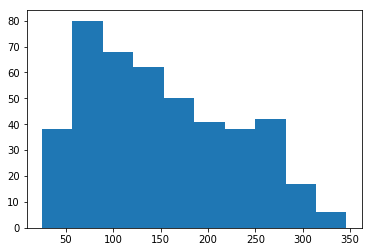

In [0]:
#show the histogram distribution of the targets
plt.hist(data_diab.target)

Note that the data matrix (i.e., input features) are stored in `data.data`; the target values are stored in `data.target`.

To prepare your data...

1. Split your data into train and test sets.
2. Standardize your data.

> Note that the description indicate that these data have already been scaled.  Let's go through the motions and scale explicitly here, since you typically will _not_ have someone else scaling your data for you. 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Split the data into X_train, X_test, y_train, y_test

X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(data_diab.data, data_diab.target, test_size=0.2)

#Use StandardScaler to scale the input part

ss = StandardScaler()
X_train_diab = ss.fit_transform(X_train_diab)
X_test_diab = ss.transform(X_test_diab)


#Show the dimension of X_train

X_train_diab.shape


(353, 10)

In [0]:
X_train_diab[:5]

array([[-1.26961445, -0.92096012,  0.98290391, -0.4288452 , -0.21283846,
        -0.15769087,  0.45183477, -0.80323958, -0.55992176, -0.18559072],
       [ 0.50060704,  1.08582335, -0.77916399, -1.01089846, -1.89128849,
        -1.56046388, -0.68580913, -0.80323958, -0.63533363, -0.27364654],
       [ 0.42364089,  1.08582335,  1.00608901,  0.61400024, -1.29387407,
        -1.1532072 , -1.52008133,  0.56173709,  0.9541062 ,  0.87107905],
       [ 0.73150549, -0.92096012,  0.42646142,  1.17180129,  0.24233443,
        -1.12734963, -1.4442384 ,  1.47172154,  2.7127442 ,  0.16663253],
       [-0.57691909, -0.92096012,  1.74801234,  2.06913341, -0.07059693,
         0.37238925, -0.38243742,  0.07641206, -0.60986189,  0.78302323]])

In [0]:
y_train_diab.shape

(353,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

import numpy
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.utils import plot_model
from keras import utils

In [0]:
model_diab = Sequential()

In [0]:
#build a feedforward NN with one hidden layer
input_size =X_train_diab.shape[1]

model_diab.add(Dense(input_size*3, input_dim=input_size, activation='relu', init='uniform'))
model_diab.add(Dense(1, init='uniform', activation='linear'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=10, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
from keras.optimizers import Adam
#compile the model with loss='mean_squared_error' and optimizer=adam
model_diab.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [0]:
#Train the model with X_train, y_train and validation data as X_test, y_test

estimator_diab = model_diab.fit(X_train_diab, y_train_diab, validation_data=(X_test_diab, y_test_diab),epochs=30, batch_size=20,  verbose=0);



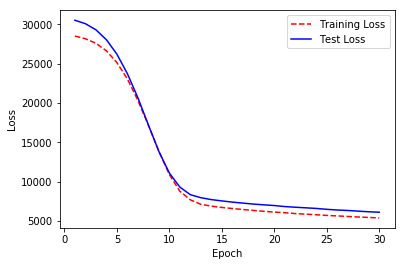

In [0]:
#Show the training and testing loss profile curves
training_loss = estimator_diab.history['loss']
test_loss = estimator_diab.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [0]:
predictions = model_diab.predict(X_test_diab)
score =model_diab.evaluate(X_test_diab, y_test_diab, batch_size=20,  verbose=0)
print('prediction score: %.2f%% \nMean Absolute Error: %.2f' % (score[1]*100, score[2]))
print('Mean Squared Error: %.2f'% (score[0]))

prediction score: 1.12% 
Mean Absolute Error: 63.85
Mean Squared Error: 6130.42


## Binary Classification

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data_bc = load_breast_cancer()

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(data_bc.data, data_bc.target)


In [0]:
X_train_bc.shape

(426, 30)

In [0]:
print(data_bc.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [0]:
model_bc = Sequential()


n_input = X_train_bc.shape[1]
n_hidden = n_input

model_bc.add(Dense(n_hidden, input_dim=n_input, activation='relu', init='uniform'))
model_bc.add(Dense(1, activation='sigmoid', init='uniform'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=30, activation="relu", kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [0]:
X_train_bc.shape

(426, 30)

**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='binary_crossentropy' **

In [0]:

# Compile model
model_bc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
estimator_bc = model_bc.fit(X_train_bc, y_train_bc, validation_data=(X_test_bc, y_test_bc),epochs=30, batch_size=20,  verbose=0);

In [0]:
predictions = model_bc.predict(X_test_bc)
score =model_bc.evaluate(X_test_bc, y_test_bc, batch_size=20,  verbose=0)
print('prediction score: %.2f%%' % (score[1]*100))

prediction score: 94.41%


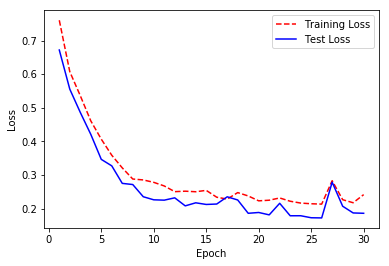

In [0]:
#Show the training and testing loss profile curves
training_loss = estimator_bc.history['loss']
test_loss = estimator_bc.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Multi-Class Classification

In [0]:
from sklearn.datasets import load_iris
from keras.utils import to_categorical

In [0]:
data_iris = load_iris()

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(data_iris.data, data_iris.target)



**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='categorical_crossentropy''**

In [0]:
X_train_iris.shape

(112, 4)

In [0]:
print(y_train_iris)

[1 2 0 2 1 0 0 2 1 1 2 0 2 2 2 0 1 0 0 2 0 1 0 2 0 2 2 2 0 0 0 2 0 0 1 2 1
 0 1 1 2 2 0 0 1 1 2 1 1 2 2 1 0 2 2 1 0 2 0 0 1 1 0 0 1 2 2 1 0 1 2 1 2 2
 1 2 1 1 2 1 0 0 0 1 0 2 0 0 0 1 2 2 1 2 0 0 1 2 1 1 2 2 2 1 0 0 2 0 2 2 2
 1]


In [0]:
y_train_iris_c = utils.to_categorical(y_train_iris, num_classes=3)
y_test_iris_c = utils.to_categorical(y_test_iris, num_classes=3)
print('original y_train size:',y_train_iris.shape,'transformed y_train shape:', y_train_iris_c.shape)

original y_train size: (112,) transformed y_train shape: (112, 3)


In [0]:
# create a feedforward model
model_iris = Sequential()
input_size =X_train_iris.shape[1]
model_iris.add(Dense(input_size*72, input_dim=input_size, init='uniform', activation='relu'))
model_iris.add(Dense(3, init='uniform', activation='sigmoid'))
# Compile model
model_iris.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(288, input_dim=4, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
# Fit the model
estimator_iris = model_iris.fit(X_train_iris, y_train_iris_c, validation_data=(X_test_iris, y_test_iris_c),epochs=30, batch_size=20,  verbose=0);

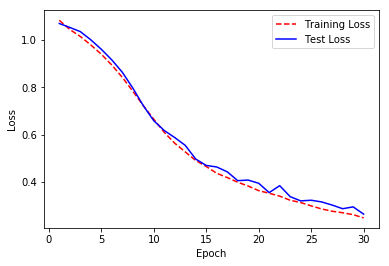

In [0]:
#Plot the training and testing loss courves
training_loss = estimator_iris.history['loss']
test_loss = estimator_iris.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [0]:
predictions = model_iris.predict(X_test_iris)
score =model_iris.evaluate(X_test_iris, y_test_iris_c, batch_size=20,  verbose=0)
print('prediction score: %.2f%%' % (score[1]*100))

prediction score: 97.37%
